### This notebook is used to determine VaR of the currency portfolio assuming an equal weighting

#### Import data, get necessary dataframe

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
    
# Create our portfolio of forex, assing equal weighting 
Eur_USD=pd.read_csv("Eur_USD_VaR.csv")
GBP_USD=pd.read_csv("GBP_USD_VaR.csv")
AUD_USD=pd.read_csv("AUD_USD_VaR.csv")
USD_JPY=pd.read_csv("USD_JPY_VaR.csv")
EUR_GBP=pd.read_csv("EUR_GBP_VaR.csv")

# Set the investment weights (arbitrarily picked equal weighting)
weights = np.array([.2,0.2,0.2,0.2,0.2])
 
# Set an initial investment level
initial_investment = 100000

closing_prices=pd.DataFrame(Eur_USD['EURUSD Close'])
closing_prices['GBPUSD Close']=GBP_USD['GBPUSD Close']
closing_prices['AUDUSD Close']=AUD_USD['AUDUSD Close']
closing_prices['USDJPY Close']=USD_JPY['USDJPY Close']
closing_prices['EURGBP Close']=EUR_GBP['EURGBP Close']
 
#From the closing prices, calculate periodic returns
returns = closing_prices.pct_change()

returns.tail()

#### Generate Variance-Covariance Matrix

In [73]:
# Generate Var-Cov matrix
cov_matrix = returns.cov()
cov_matrix

,EURUSD Close,GBPUSD Close,AUDUSD Close,USDJPY Close,EURGBP Close
EURUSD Close,0.000021,0.000018,0.000019,-1.440461e-05,2.877340e-06
GBPUSD Close,0.000018,0.000046,0.000035,-1.505696e-05,-2.792097e-05
AUDUSD Close,0.000019,0.000035,0.000057,-8.607883e-06,-1.640851e-05
USDJPY Close,-0.000014,-0.000015,-0.000009,3.366376e-05,8.719134e-07
EURGBP Close,0.000003,-0.000028,-0.000016,8.719134e-07,3.063521e-05


#### Calculations

In [ ]:
# Calculate mean returns for each stock
avg_rets = returns.mean()
 
# Calculate mean returns for portfolio overall, 
# using dot product to 
# normalize individual means against investment weights
 # https://en.wikipedia.org/wiki/Dot_product#:~:targetText=In%20mathematics%2C%20the%20dot%20product,and%20returns%20a%20single%20number.
port_mean = avg_rets.dot(weights)
 
# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
 
# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment
             
# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev

#### Choose a confidence level of 95%

In [86]:
# Select our confidence interval (I'll choose 99% here)
conf_level1 = 0.05

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
# as calculated above
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [87]:
#Finally, we can calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
var_1d1

450.341827512515

#### Estimate VaR for n days

In [98]:
# Calculate n Day VaR
var_array = []
num_days = int(365)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))


1 day VaR @ 95% confidence: 450.34
2 day VaR @ 95% confidence: 636.88
3 day VaR @ 95% confidence: 780.01
4 day VaR @ 95% confidence: 900.68
5 day VaR @ 95% confidence: 1006.99
6 day VaR @ 95% confidence: 1103.11
7 day VaR @ 95% confidence: 1191.49
8 day VaR @ 95% confidence: 1273.76
9 day VaR @ 95% confidence: 1351.03
10 day VaR @ 95% confidence: 1424.11
11 day VaR @ 95% confidence: 1493.61
12 day VaR @ 95% confidence: 1560.03
13 day VaR @ 95% confidence: 1623.73
14 day VaR @ 95% confidence: 1685.02
15 day VaR @ 95% confidence: 1744.17
16 day VaR @ 95% confidence: 1801.37
17 day VaR @ 95% confidence: 1856.81
18 day VaR @ 95% confidence: 1910.64
19 day VaR @ 95% confidence: 1962.99
20 day VaR @ 95% confidence: 2013.99
21 day VaR @ 95% confidence: 2063.73
22 day VaR @ 95% confidence: 2112.29
23 day VaR @ 95% confidence: 2159.76
24 day VaR @ 95% confidence: 2206.22
25 day VaR @ 95% confidence: 2251.71
26 day VaR @ 95% confidence: 2296.3
27 day VaR @ 95% confidence: 2340.04
28 day VaR @ 95

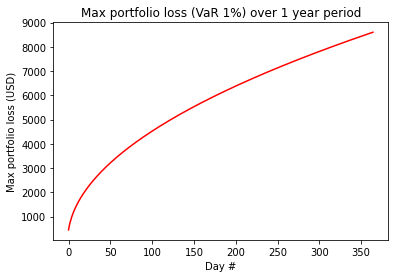

In [91]:
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR 1%) over 1 year period")
plt.plot(var_array, "r")

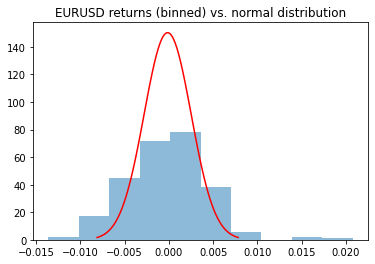

In [92]:
# Repeat for each currency in portfolio
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.hist(returns['EURUSD Close'],alpha=0.5)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
plt.title("EURUSD returns (binned) vs. normal distribution")
plt.show()

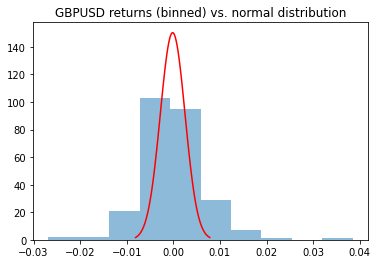

In [93]:
# Repeat for each currency in portfolio
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.hist(returns['GBPUSD Close'],alpha=0.5)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
plt.title("GBPUSD returns (binned) vs. normal distribution")
plt.show()

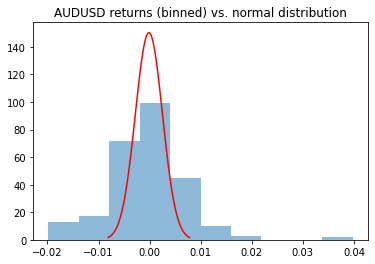

In [94]:
# Repeat for each currency in portfolio
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.hist(returns['AUDUSD Close'],alpha=0.5)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
plt.title("AUDUSD returns (binned) vs. normal distribution")
plt.show()

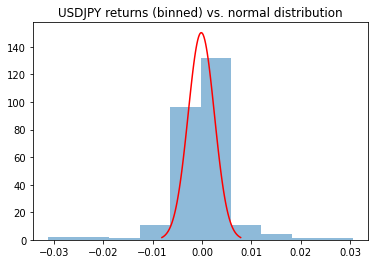

In [95]:
# Repeat for each currency in portfolio
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.hist(returns['USDJPY Close'],alpha=0.5)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
plt.title("USDJPY returns (binned) vs. normal distribution")
plt.show()

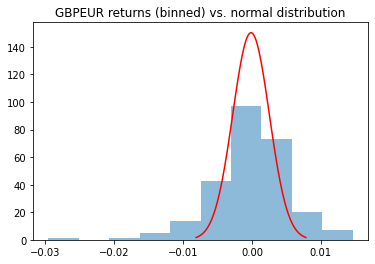

In [96]:
# Repeat for each currency in portfolio
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.hist(returns['EURGBP Close'],alpha=0.5)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
plt.title("GBPEUR returns (binned) vs. normal distribution")
plt.show()